## Simon Algoritması

In [1]:
import cirq
import numpy as np
from matplotlib import pyplot

In [2]:
b = '110' # Mesaj
n = len(b) # 3*2 adet kubit gerekli

simon_circuit = cirq.Circuit()
all_qubits = cirq.LineQubit.range(n*2)
register_qubits = all_qubits[0:n]
ancilla_qubits = all_qubits[n:n*2]

In [3]:
# Her kayıtçı kubitine Hadamard uygulanır.
simon_circuit.append(cirq.H.on_each(*register_qubits))
simon_circuit.append(cirq.I.on_each(*ancilla_qubits))
print(simon_circuit)

0: ───H───

1: ───H───

2: ───H───

3: ───I───

4: ───I───

5: ───I───


In [4]:
# Bu adımda Simon algoritması için gereken Oracle karakutu fonksiyonunu eklenir.
b_t = b[::-1] # B'yi tersler
n = len(b_t)

# Döünüşüm; |x>|0> -> |x>|x>
for q in range(n):
    simon_circuit.append(cirq.CX(all_qubits[q], all_qubits[q+n]))

# 1:1 eşleşmeleri atla.
if '1' not in b:
    pass
else:
    i = b_t.find('1')  # b'de ilk sıfır olmayan bit.
    for q in range(n): # |x> -> |s.x> uygula eğer q_i = 1
        if b_t[q] == '1':
            simon_circuit.append(cirq.CX(all_qubits[i], all_qubits[q+n]))
print(simon_circuit)

          ┌───┐
0: ───H────@──────────────
           │
1: ───H────┼@─────@───@───
           ││     │   │
2: ───H────┼┼@────┼───┼───
           │││    │   │
3: ───I────X┼┼────┼───┼───
            ││    │   │
4: ───I─────X┼────X───┼───
             │        │
5: ───I──────X────────X───
          └───┘


In [5]:
# Bu adımda girdi kubitlere tekrar Hadamard uygulnır.
simon_circuit.append(cirq.H.on_each(*register_qubits))

# Yine kayıtçı kubitlere ölçüm eklenir.
simon_circuit.append(cirq.measure(*register_qubits, key="M"))
print(simon_circuit)

          ┌───┐   ┌──┐
0: ───H────@───────H─────────────M('M')───
           │                     │
1: ───H────┼@──────@─────@───H───M────────
           ││      │     │       │
2: ───H────┼┼@─────┼H────┼───────M────────
           │││     │     │
3: ───I────X┼┼─────┼─────┼────────────────
            ││     │     │
4: ───I─────X┼─────X─────┼────────────────
             │           │
5: ───I──────X───────────X────────────────
          └───┘   └──┘


In [6]:
# Devre simüle edilir.
simulator = cirq.Simulator()
result = simulator.run(simon_circuit, repetitions=1024)

Text(0, 0.5, 'Adet')

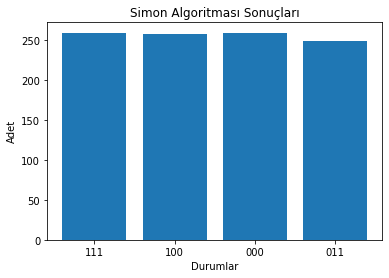

In [9]:
hist = dict()
for val in result.measurements["M"]:
    new_str = ""
    for s in val:
        new_str += str(s)
    try:
        hist[new_str] += 1
    except KeyError:
        hist[new_str] = 1
        
pyplot.bar(hist.keys(), hist.values())
pyplot.title("Simon Algoritması Sonuçları")
pyplot.xlabel("Durumlar")
pyplot.ylabel("Adet")

In [8]:
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
        return (accum % 2)

for z in hist.keys():
    print( '{}.{} = {} (mod 2)'.format(b, z, bdotz(b,z)))

110.111 = 1 (mod 2)
110.100 = 1 (mod 2)
110.000 = 0 (mod 2)
110.011 = 0 (mod 2)
